In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
toxic_train = pd.read_csv('train.csv')
toxic_test = pd.read_csv('test.csv')

In [3]:
toxic_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [5]:
tokenizer = Tokenizer(num_words=20000)

In [6]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = toxic_train[list_classes].values
list_sentences_train = toxic_train["comment_text"]
list_sentences_test = toxic_test["comment_text"]

In [7]:
tokenizer.fit_on_texts(list(list_sentences_train))

In [8]:
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [9]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

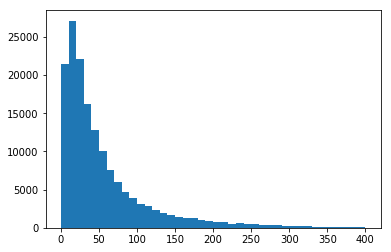

In [10]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [11]:
X_train = pad_sequences(list_tokenized_train,maxlen=200)
X_test = pad_sequences(list_tokenized_test,maxlen=200)

In [58]:
from keras.layers import Embedding,LSTM,GlobalMaxPool1D,Dense,Dropout,GRU
from keras.models import Sequential

In [67]:
model = Sequential()

In [68]:
model.add(Embedding(20000,128))

In [69]:
model.add(GRU(60,return_sequences=True,dropout=0.2,recurrent_dropout=0.2))

In [70]:
model.add(GlobalMaxPool1D())

In [71]:
#model.add(LSTM(60,return_sequences=True,dropout=0.1,recurrent_dropout=0.1))

In [72]:
model.add(Dense(50,activation='relu'))

In [73]:
model.add(Dense(6,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train, y, epochs=5, batch_size=32, validation_split=0.3)
model.save_weights('pre_trained_glove_model.h5')

Train on 111699 samples, validate on 47872 samples
Epoch 1/5
111699/111699 [==============================] - 1434s - loss: 0.0707 - acc: 0.9772 - val_loss: 0.0531 - val_acc: 0.9816
Epoch 2/5
 17152/111699 [===>..........................] - ETA: 1109s - loss: 0.0530 - acc: 0.9817

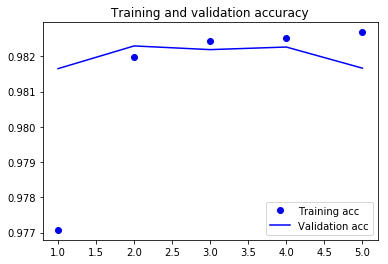

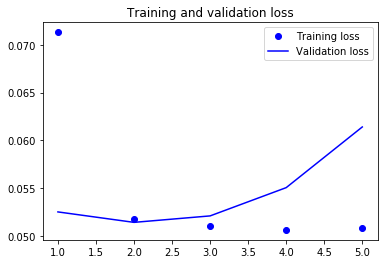

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
predictions = model.predict_proba(X_test,batch_size=32)

153164/153164 [==============================] - 535s   


In [49]:
predictions.reshape([153164,6])

array([[  9.95795369e-01,   2.07806215e-01,   9.57863688e-01,
          1.07222162e-02,   9.24076378e-01,   7.80901313e-02],
       [  2.80055276e-04,   3.20782198e-15,   3.25710403e-07,
          2.58314610e-13,   2.69175985e-07,   1.36157674e-11],
       [  3.33571625e-05,   3.49148103e-19,   4.37942083e-09,
          5.02137443e-17,   3.71434949e-09,   6.95322189e-15],
       ..., 
       [  1.44758833e-05,   2.51875325e-21,   3.62049307e-10,
          3.93607432e-19,   3.96030292e-10,   3.11474132e-16],
       [  1.30603323e-04,   3.54407353e-17,   2.18121521e-08,
          2.96251917e-16,   2.55504062e-08,   2.46518436e-13],
       [  9.33652580e-01,   1.31147541e-03,   8.21167290e-01,
          3.23765053e-05,   2.11441904e-01,   1.32238620e-03]], dtype=float32)

In [50]:
predictions.shape

(153164, 6)

In [51]:
df1 = pd.DataFrame(predictions[:,0],columns={'toxic'})
df2 = pd.DataFrame(predictions[:,1],columns={'severe_toxic'})
df3 = pd.DataFrame(predictions[:,2],columns={'obscene'})
df4 = pd.DataFrame(predictions[:,3],columns={'threat'})
df5 = pd.DataFrame(predictions[:,4],columns={'insult'})
df6 = pd.DataFrame(predictions[:,5],columns={'identity_hate'})

In [52]:
df7 = pd.concat([toxic_test['id'],df1,df2,df3,df4,df5,df6],axis=1)

In [53]:
df7.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.995795,2.078062e-01,9.578637e-01,1.072222e-02,9.240764e-01,7.809013e-02
1,0000247867823ef7,0.000280,3.207822e-15,3.257104e-07,2.583146e-13,2.691760e-07,1.361577e-11
2,00013b17ad220c46,0.000033,3.491481e-19,4.379421e-09,5.021374e-17,3.714349e-09,6.953222e-15
3,00017563c3f7919a,0.000048,2.797917e-19,3.557715e-09,2.659679e-17,4.993649e-09,1.131011e-14
4,00017695ad8997eb,0.013207,7.233321e-08,4.977510e-04,9.483541e-07,6.029759e-04,5.409018e-06


In [54]:
df7.set_index('id',inplace=True)

In [55]:
df7.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,0.995795,2.078062e-01,9.578637e-01,1.072222e-02,9.240764e-01,7.809013e-02
0000247867823ef7,0.000280,3.207822e-15,3.257104e-07,2.583146e-13,2.691760e-07,1.361577e-11
00013b17ad220c46,0.000033,3.491481e-19,4.379421e-09,5.021374e-17,3.714349e-09,6.953222e-15
00017563c3f7919a,0.000048,2.797917e-19,3.557715e-09,2.659679e-17,4.993649e-09,1.131011e-14
00017695ad8997eb,0.013207,7.233321e-08,4.977510e-04,9.483541e-07,6.029759e-04,5.409018e-06


In [56]:
df7.shape

(153164, 6)

In [57]:
df7.to_csv(path_or_buf='submission2.csv')